Processing Files: 100%|███████████████████████| 100/100 [00:27<00:00,  3.70it/s]


Score Category 1-2:
H_mean         71.915341
S_mean         63.258061
V_mean        142.055228
I1_mean        42.991439
I2_mean        62.426442
I3_mean        29.204409
L_mean         42.991439
S_lst_mean      5.358848
T_mean        124.852884
Name: 1-2, dtype: float64


Score Category 2-3:
H_mean         64.192290
S_mean         64.063524
V_mean        143.113507
I1_mean        43.724008
I2_mean        54.843367
I3_mean        27.334342
L_mean         43.724008
S_lst_mean      5.352962
T_mean        109.686733
Name: 2-3, dtype: float64


Score Category 3-4:
H_mean         58.099160
S_mean         76.172978
V_mean        140.753860
I1_mean        43.513746
I2_mean        48.610129
I3_mean        24.461293
L_mean         43.513746
S_lst_mean      5.554180
T_mean         97.220257
Name: 3-4, dtype: float64


Score Category 4-5:
H_mean         63.262993
S_mean         76.378843
V_mean        142.928185
I1_mean        43.089524
I2_mean        55.236941
I3_mean        24.209649
L_mean     

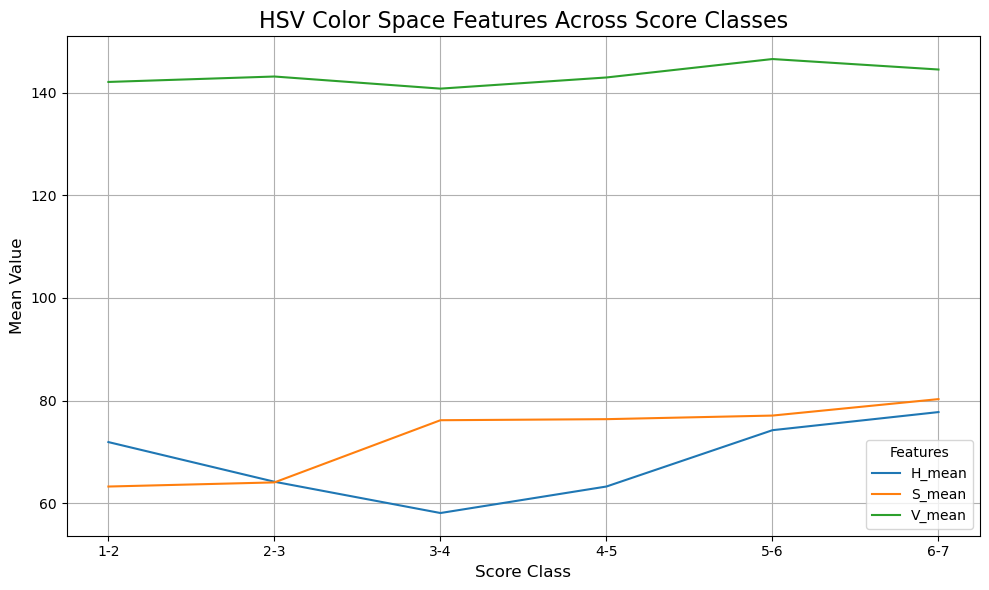

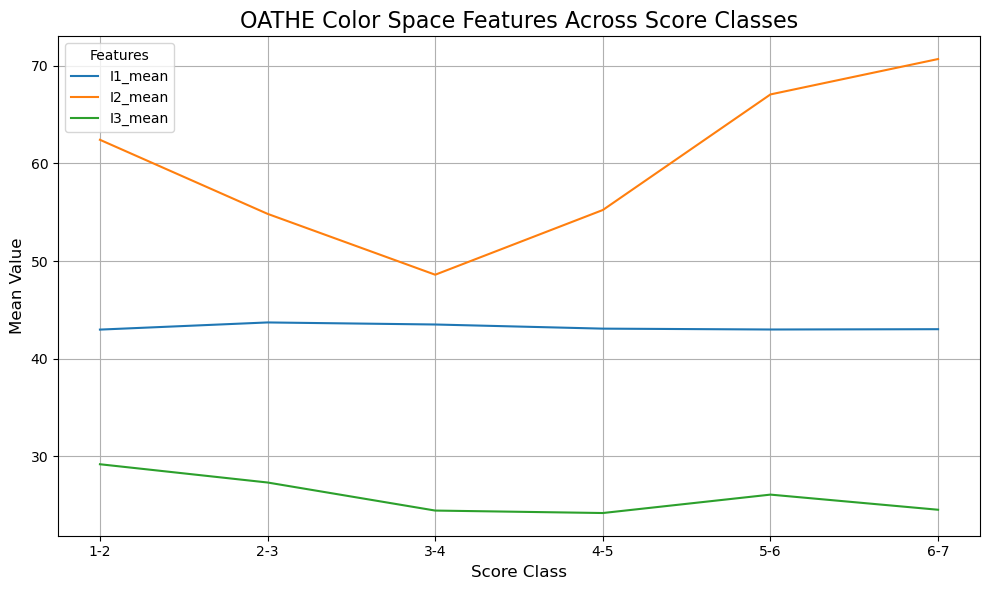

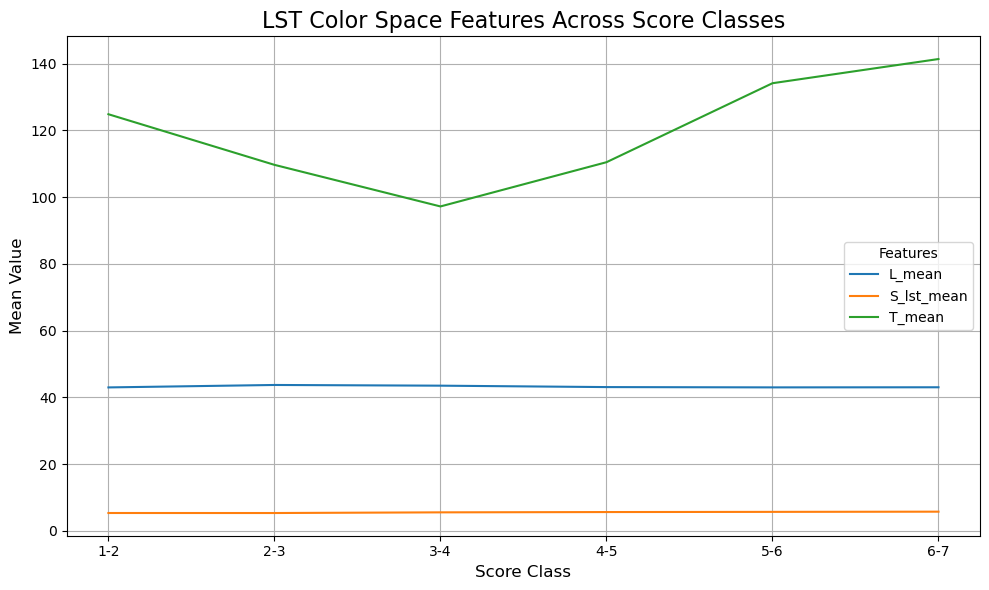

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

# File paths
scenery_folder = '../../data/processed/landscape_color_features'
ratings_folder = '../../data/processed/landscape_score'

# Define score intervals
bins = [1, 2, 3, 4, 5, 6, 7]
labels = ["1-2", "2-3", "3-4", "4-5", "5-6", "6-7"]

# Get list of files
ratings_files = [f for f in os.listdir(ratings_folder) if f.startswith("processed_ns6_clean_") and f.endswith(".csv")]
scenery_files = [f.replace("processed_", "") for f in ratings_files]

# List to store merged data frames
merged_data_list = []

try:
    # Process files
    for ratings_file, scenery_file in tqdm(zip(ratings_files, scenery_files), total=len(ratings_files), desc="Processing Files"):
        # Read ratings and color feature files
        ratings_data = pd.read_csv(os.path.join(ratings_folder, ratings_file))
        scenery_data = pd.read_csv(os.path.join(scenery_folder, scenery_file))
        ratings_data['image_path'] = ratings_data['image_path'].apply(lambda x: x.split("data/processed/wikimedia_commons/images/")[-1])
        scenery_data['image_path'] = scenery_data['image_path'].apply(lambda x: x.split("data/processed/wikimedia_commons/images/")[-1])
        
        # Assign score categories based on predicted_score
        ratings_data['score_category'] = pd.cut(ratings_data['predicted_score'], bins=bins, labels=labels, right=False)
        
        # Merge ratings and color feature data
        df_merged = pd.merge(ratings_data[['image_path', 'score_category']], scenery_data, left_on='image_path', right_on='image_path', how='inner')
        
        # Add to the list
        merged_data_list.append(df_merged)

    # Concatenate all data
    merged_df = pd.concat(merged_data_list, ignore_index=True)
    
    # Specify color feature columns
    color_features = ['H_mean', 'S_mean', 'V_mean', 'I1_mean', 'I2_mean', 'I3_mean', 'L_mean', 'S_lst_mean', 'T_mean']
    
    # Calculate mean of color features for each score category
    mean_colors_by_category = merged_df.groupby('score_category', observed=False)[color_features].mean()
    
    
    # Output the mean values of the color features for each score category
    for category in mean_colors_by_category.index:
        print(f"Score Category {category}:")
        print(mean_colors_by_category.loc[category])
        print("\n")

    # Visualize the color features for each score category
    hsv_features = ['H_mean', 'S_mean', 'V_mean']
    oathe_features = ['I1_mean', 'I2_mean', 'I3_mean']
    lst_features = ['L_mean', 'S_lst_mean', 'T_mean']

    color_spaces = {
        'HSV': hsv_features,
        'OATHE': oathe_features,
        'LST': lst_features
    }

    for space_name, features in color_spaces.items():
        plt.figure(figsize=(10, 6))
        for feature in features:
            plt.plot(mean_colors_by_category.index, mean_colors_by_category[feature], label=feature)
        
        plt.title(f'{space_name} Color Space Features Across Score Classes', fontsize=16)
        plt.xlabel('Score Class', fontsize=12)
        plt.ylabel('Mean Value', fontsize=12)
        plt.legend(title='Features')
        plt.grid(True)
        plt.tight_layout()
        # plt.savefig(f"/home/ubuntu/landscape-aesthetics/reports/figures/{space_name}.jpg")
        plt.show()

except Exception as e:
    print(f"An error occurred during processing: {e}")


In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# File paths
scenery_folder = '../../data/processed/landscape_color_features'
ratings_folder = '../../data/processed/landscape_score'

# Define score intervals
bins = [1, 2, 3, 4, 5, 6, 7]
labels = ["1-2", "2-3", "3-4", "4-5", "5-6", "6-7"]

# Get list of files
ratings_files = [f for f in os.listdir(ratings_folder) if f.startswith("processed_ns6_clean_") and f.endswith(".csv")]
scenery_files = [f.replace("processed_", "") for f in ratings_files]

# List to store merged data frames
merged_data_list = []

try:
    # Process files
    for ratings_file, scenery_file in tqdm(zip(ratings_files, scenery_files), total=len(ratings_files), desc="Processing Files"):
        # Read ratings and color feature files
        ratings_data = pd.read_csv(os.path.join(ratings_folder, ratings_file))
        scenery_data = pd.read_csv(os.path.join(scenery_folder, scenery_file))
        
        # Standardize image paths by removing the root part
        ratings_data['image_path'] = ratings_data['image_path'].apply(lambda x: x.split("data/processed/wikimedia_commons/images/")[-1])
        scenery_data['image_path'] = scenery_data['image_path'].apply(lambda x: x.split("data/processed/wikimedia_commons/images/")[-1])
        
        # Assign score categories based on predicted_score
        ratings_data['score_category'] = pd.cut(ratings_data['predicted_score'], bins=bins, labels=labels, right=False)
        
        # Merge ratings and color feature data on standardized image path
        df_merged = pd.merge(ratings_data[['image_path', 'score_category', 'predicted_score']], scenery_data, left_on='image_path', right_on='image_path', how='inner')
        
        # Add to the list of dataframes
        merged_data_list.append(df_merged)

    # Concatenate all dataframes
    merged_df = pd.concat(merged_data_list, ignore_index=True)
    
    # Specify color feature columns
    color_features = ['H_mean', 'S_mean', 'V_mean', 'I1_mean', 'I2_mean', 'I3_mean', 'L_mean', 'S_lst_mean', 'T_mean']

    # Plot each color space with a regression line (without scatter points)
    hsv_features = ['H_mean', 'S_mean', 'V_mean']
    oathe_features = ['I1_mean', 'I2_mean', 'I3_mean']
    lst_features = ['L_mean', 'S_lst_mean', 'T_mean']

    color_spaces = {
        'HSV': hsv_features,
        'OATHE': oathe_features,
        'LST': lst_features
    }

    for space_name, features in tqdm(color_spaces.items(), desc="Processing color space"):
        plt.figure(figsize=(10, 6))
        for feature in features:
            sns.regplot(
                x=merged_df['predicted_score'], 
                y=merged_df[feature], 
                scatter=False,  # Disable scatter points
                label=feature
            )
        
        plt.title(f'{space_name} Color Space Features vs. Score (Fitted Curve)', fontsize=16)
        plt.xlabel('Score', fontsize=12)
        plt.ylabel('Feature Value', fontsize=12)
        plt.legend(title='Features')
        plt.grid(True)
        plt.tight_layout()
        # Uncomment the line below to save each plot as a separate image file
        # plt.savefig(f"/home/ubuntu/landscape-aesthetics/reports/figures/{space_name}_fitted_curve.jpg")
        plt.show()

except Exception as e:
    print(f"An error occurred during processing: {e}")


Processing color space:   0%|                             | 0/3 [00:00<?, ?it/s]

An error occurred during processing: pairplot() got an unexpected keyword argument 'x'


<Figure size 1000x600 with 0 Axes>

/tmp/ipykernel_657880/3473357067.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['score_category'] = merged_df['score_category'].replace(category_mapping)
/tmp/ipykernel_657880/3473357067.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  merged_df['score_category'] = merged_df['score_category'].replace(category_mapping)


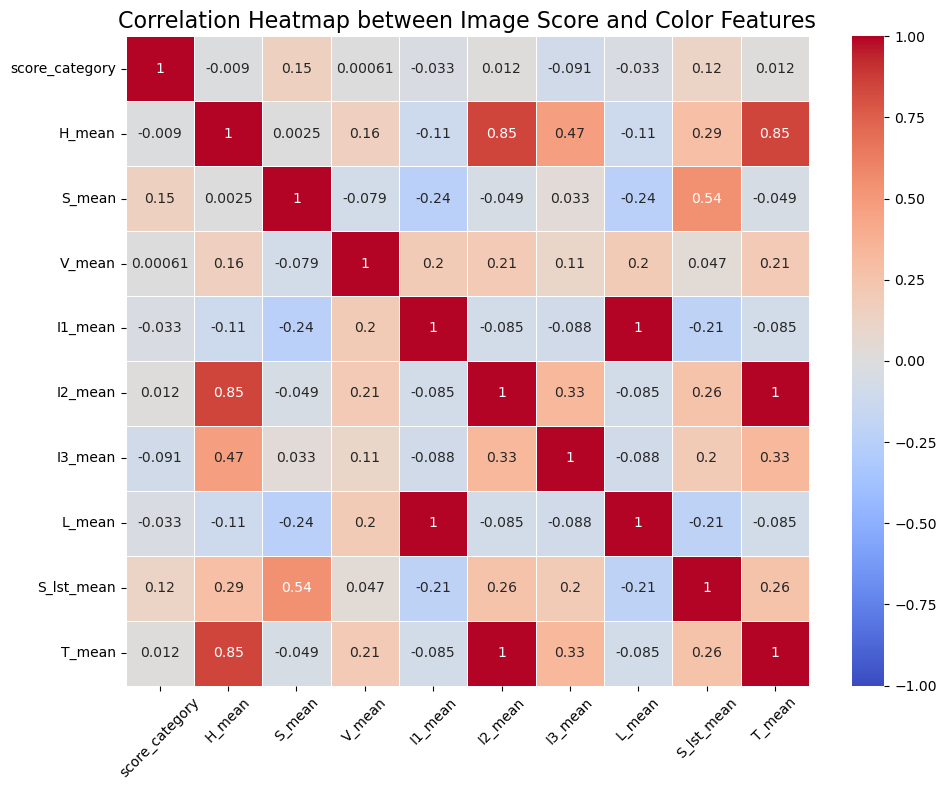

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

merged_df = pd.concat(merged_data_list, ignore_index=True)

category_mapping = {"1-2": 1, "2-3": 2, "3-4": 3, "4-5": 4, "5-6": 5, "6-7": 6}

merged_df['score_category'] = merged_df['score_category'].replace(category_mapping)

color_features = ['H_mean', 'S_mean', 'V_mean', 'I1_mean', 'I2_mean', 'I3_mean', 'L_mean', 'S_lst_mean', 'T_mean']

df_corr = merged_df[['score_category'] + color_features]

correlation_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Correlation Heatmap between Image Score and Color Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig("/home/ubuntu/landscape-aesthetics/reports/figures/correlation_heatmap_in_wikidata.jpg")
plt.show()
